## **Prepare data**

In [87]:
!pip install researchpy

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from researchpy.correlation import corr_case

In [89]:
df = pd.read_csv("/content/title_single_valued_attrs.csv", delimiter=',')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [90]:
df.tail()

,title,romaji_title,english_title,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist,duration,status,episodes,source,season_season,season_year,media_type,anilist_url,creator,prequel,sequel,directors,status_completed_anilist,status_planning_anilist,status_current_anilist,status_paused_anilist,status_dropped_anilist,start_date,end_date,mean_score_anisearch,popularity_anisearch,favorites_anisearch,status_completed_anisearch,status_planning_anisearch,status_current_anisearch,status_paused_anisearch,status_dropped_anisearch,number_scorer_anisearch,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
30581,xingxing tan zhang,NaN,NaN,NaN,NaN,NaN,NaN,11.0,finished,10.0,original work,NaN,NaN,tv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pg,NaN,NaN,NaN,NaN,NaN,9.0,0.0,0.0
30582,xiao jingling hui dou,NaN,NaN,NaN,NaN,NaN,NaN,12.0,finished,26.0,original work,NaN,NaN,tv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pg,NaN,NaN,NaN,NaN,NaN,9.0,1.0,0.0
30583,seiken gakuin no makentsukai,NaN,NaN,NaN,NaN,NaN,NaN,0.0,not yet released,0.0,light novel,NaN,NaN,tv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,6.0
30584,zombieland saga movie,NaN,NaN,NaN,NaN,NaN,NaN,0.0,not yet released,1.0,original work,NaN,NaN,movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,r,NaN,NaN,NaN,NaN,NaN,0.0,0.0,30.0
30585,kingdom 4th season,NaN,NaN,NaN,NaN,NaN,NaN,0.0,not yet released,0.0,manga,spring,2022.0,tv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,r,NaN,NaN,NaN,NaN,NaN,0.0,0.0,30.0


##**Check for null values**

In [91]:
print(df.isnull().sum() / len(df) * 100)
print(f"Total number of records: {len(df)}")

title                          0.000000
romaji_title                  39.557314
english_title                 73.317858
mean_score_anilist            53.969136
weighted_score_anilist        67.302034
popularity_anilist            51.863598
favorites_anilist             66.595828
duration                       4.211077
status                         0.003269
episodes                       2.635193
source                        22.984372
season_season                 45.324658
season_year                   45.324658
media_type                     0.294252
anilist_url                   51.863598
creator                       73.157654
prequel                       90.394298
sequel                        90.567580
directors                     82.328516
status_completed_anilist      51.863598
status_planning_anilist       51.863598
status_current_anilist        51.863598
status_paused_anilist         51.863598
status_dropped_anilist        51.863598
start_date                    11.178317


##**Distribution and Central tendency**

### **Calculate Mode, Mean and Median**

In [92]:
df['mean_score_anilist'] = df['mean_score_anilist'].apply(lambda x: x*10)

In [93]:
# Anilist
# Prepare data
df_anilist = df.dropna(subset=['mean_score_anilist'])
df_anilist.reset_index(drop=True, inplace=True)
# df_anilist.head()
# Calculate mode
mode_anilist = df_anilist['mean_score_anilist'].mode().iloc[0]
print(mode_anilist) 
# Calculate mean
mean_anilist = round(df_anilist['mean_score_anilist'].mean(), 2)
print(mean_anilist)
# Calculate median
median_anilist = df_anilist['mean_score_anilist'].median()
print(median_anilist)

6.0
5.92
6.0


In [94]:
# print(df_anilist.isnull().sum() / len(df_anilist) * 100)
# print(f"Total number of records: {len(df_anilist)}")
print(len(df_anilist['mean_score_anilist']))

14079


In [95]:
# Anisearch
# Prepare data
df_anisearch = df.dropna(subset=['mean_score_anisearch'])
df_anisearch.reset_index(drop=True, inplace=True)
# Calculate mode
mode_anisearch = df_anisearch['mean_score_anisearch'].mode().iloc[0]
print(mode_anisearch) 
# Calculate mean
mean_anisearch = round(df_anisearch['mean_score_anisearch'].mean(), 2)
print(mean_anisearch)
# Calculate median
median_anisearch = df_anisearch['mean_score_anisearch'].median()
print(median_anisearch)
print(len(df_anisearch['mean_score_anisearch']))

0.0
4.53
4.86
15947


In [96]:
# Mal
# Prepare data
df_mal = df.dropna(subset=['mean_score_mal'])
df_mal.reset_index(drop=True, inplace=True)
# Calculate mode
mode_mal = df_mal['mean_score_mal'].mode().iloc[0]
print(mode_mal) 
# Calculate mean
mean_mal = round(df_mal['mean_score_mal'].mean(), 2)
print(mean_mal)
# Calculate median
median_mal = df_mal['mean_score_mal'].median()
print(median_mal)
print(len(df_mal['mean_score_mal']))

6.21
6.47
6.47
13371


In [97]:
# Kitsu
df_kitsu = df.dropna(subset=['mean_score_kitsu'])
df_kitsu.reset_index(drop=True, inplace=True)
# Calculate mode
mode_kitsu = df_kitsu['mean_score_kitsu'].mode().iloc[0]
print(mode_kitsu) 
# Calculate mean
mean_kitsu = round(df_kitsu['mean_score_kitsu'].mean(), 2)
print(mean_kitsu)
# Calculate median
median_kitsu = df_kitsu['mean_score_kitsu'].median()
print(median_kitsu)
print(len(df_kitsu['mean_score_kitsu']))

8.21
6.82
6.84
7919


### **Visualize Mean, Median, Mode on Anilist**

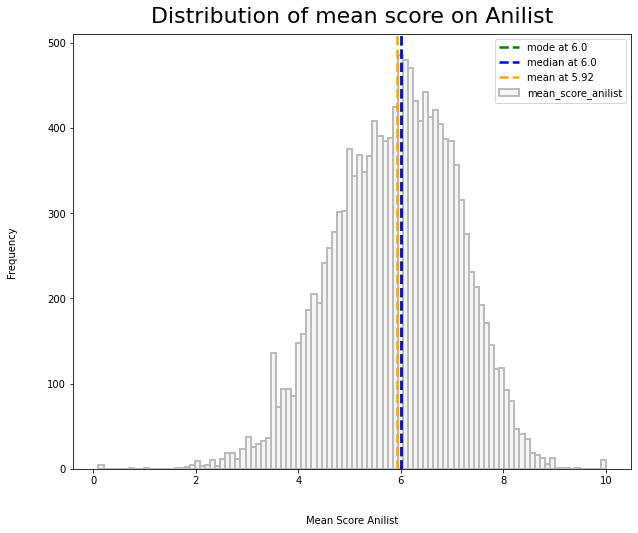

In [98]:
df['mean_score_anilist'].plot(kind='hist', figsize=(10, 8), linewidth=2, bins=100, color='whitesmoke', edgecolor='#BBBBBB')
plt.xlabel('Mean Score Anilist', labelpad=30)
plt.ylabel('Frequency', labelpad=30)
plt.title('Distribution of mean score on Anilist', y=1.012, fontsize=22)
measurements = [mode_anilist, median_anilist, mean_anilist]
names = ['mode', 'median', 'mean']
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
      plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()

### **Visualize Mean, Median, Mode on Anisearch**



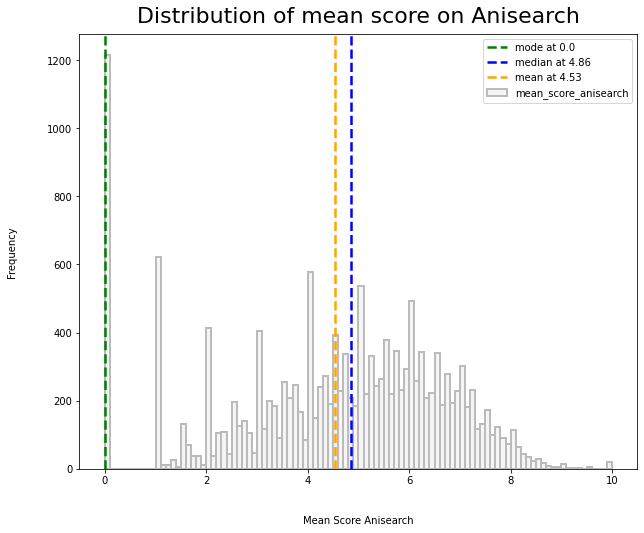

In [99]:
df['mean_score_anisearch'].plot(kind='hist', figsize=(10, 8), linewidth=2, bins=100, color='whitesmoke', edgecolor='#BBBBBB')
plt.xlabel('Mean Score Anisearch', labelpad=30)
plt.ylabel('Frequency', labelpad=30)
plt.title('Distribution of mean score on Anisearch', y=1.012, fontsize=22)
measurements = [mode_anisearch, median_anisearch, mean_anisearch]
names = ['mode', 'median', 'mean']
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
      plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()

### **Visualize Mean, Median, Mode on MAL**


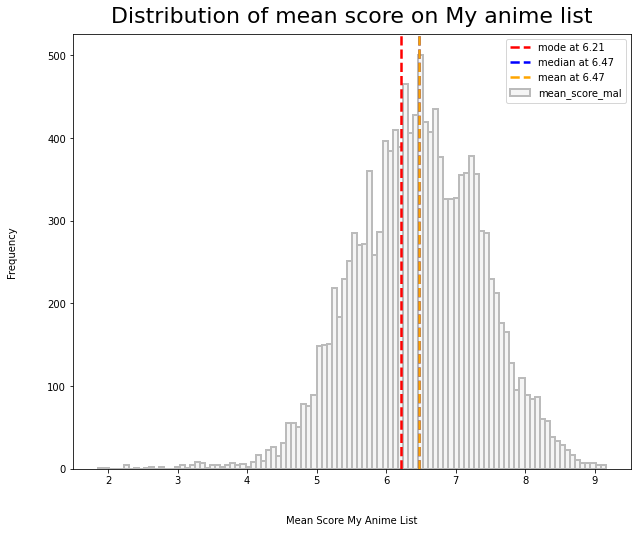

In [100]:
df['mean_score_mal'].plot(kind='hist', figsize=(10, 8), linewidth=2, bins=100, color='whitesmoke', edgecolor='#BBBBBB')
plt.xlabel('Mean Score My Anime List', labelpad=30)
plt.ylabel('Frequency', labelpad=30)
plt.title('Distribution of mean score on My anime list', y=1.012, fontsize=22)
measurements = [mode_mal, median_mal, mean_mal]
names = ['mode', 'median', 'mean']
colors = ['red', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
      plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()

###**Visualize Mean, Median, Mode on kitsu**





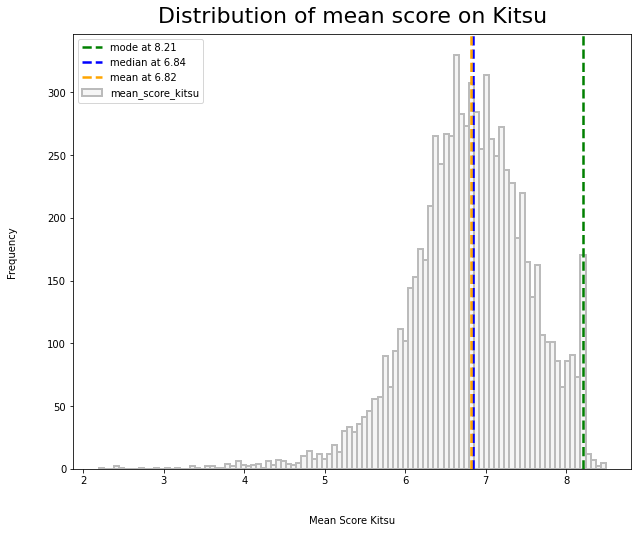

In [101]:
df['mean_score_kitsu'].plot(kind='hist', figsize=(10, 8), linewidth=2, bins=100, color='whitesmoke', edgecolor='#BBBBBB')
plt.xlabel('Mean Score Kitsu', labelpad=30)
plt.ylabel('Frequency', labelpad=30)
plt.title('Distribution of mean score on Kitsu', y=1.012, fontsize=22)
measurements = [mode_kitsu, median_kitsu, mean_kitsu]
names = ['mode', 'median', 'mean']
colors = ['green', 'blue', 'orange']
for measurement, name, color in zip(measurements, names, colors):
      plt.axvline(x=measurement, linestyle='--', linewidth=2.5, label='{0} at {1}'.format(name, measurement), c=color)
plt.legend()

## **Correlation Heatmaps**

In [102]:
df.head()

,title,romaji_title,english_title,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist,duration,status,episodes,source,season_season,season_year,media_type,anilist_url,creator,prequel,sequel,directors,status_completed_anilist,status_planning_anilist,status_current_anilist,status_paused_anilist,status_dropped_anilist,start_date,end_date,mean_score_anisearch,popularity_anisearch,favorites_anisearch,status_completed_anisearch,status_planning_anisearch,status_current_anisearch,status_paused_anisearch,status_dropped_anisearch,number_scorer_anisearch,url,age,mean_score_kitsu,favorite_count_kitsu,rating_rank_kitsu,user_count_kitsu,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,attack on titan,shingeki no kyojin,attack on titan,8.5,0.85,500176.0,46026.0,24.0,finished,25.0,manga,spring,2013.0,tv,https://anilist.co/anime/16498/shingeki-no-kyo...,tetsurou araki,shingeki no kyojin gaiden: kuinaki sentaku,shingeki no kyojin 2,hajime isayama,417696.0,35820.0,29872.0,8863.0,7925.0,2013-04-07,2013-09-28,8.60,31.0,1018.0,7017.0,472.0,584.0,70.0,102.0,6963.0,"https://www.anisearch.com/anime/8219,attack-on...",r,8.49,6835.0,11.0,350376.0,8.51,3104669.0,2168959.0,137690.0
1,death note,death note,death note,8.4,0.84,454179.0,34209.0,23.0,finished,37.0,manga,fall,2006.0,tv,https://anilist.co/anime/1535/death-note/,tetsurou araki,NaN,NaN,NaN,352362.0,45544.0,26067.0,16071.0,14135.0,2006-10-04,2007-06-27,9.00,4.0,1182.0,11442.0,452.0,916.0,128.0,295.0,11737.0,"https://www.anisearch.com/anime/3633,death-note",r,8.36,5750.0,25.0,303639.0,8.63,3130472.0,2159771.0,142925.0
2,my hero academia,boku no hero academia,my hero academia,7.9,0.79,452700.0,23439.0,24.0,finished,13.0,manga,spring,2016.0,tv,https://anilist.co/anime/21459/boku-no-hero-ac...,kenji nagasaki,NaN,boku no hero academia 2,kouhei horikoshi,372716.0,37987.0,28066.0,7123.0,6808.0,2016-04-03,2016-06-26,8.18,152.0,273.0,3415.0,414.0,188.0,21.0,36.0,3185.0,"https://www.anisearch.com/anime/10978,my-hero-...",pg,8.45,4349.0,15.0,325631.0,7.99,2396529.0,1624157.0,50118.0
3,demon slayer kimetsu no yaiba,kimetsu no yaiba,demon slayer: kimetsu no yaiba,8.5,0.85,444903.0,38842.0,24.0,finished,26.0,manga,spring,2019.0,tv,https://anilist.co/anime/101922/kimetsu-no-yaiba/,haruo sotozaki,NaN,kimetsu no yaiba: mugen ressha-hen,koyoharu gotouge,340821.0,48268.0,39899.0,9597.0,6318.0,2019-04-06,2019-09-28,8.68,20.0,237.0,2384.0,528.0,297.0,45.0,43.0,2335.0,"https://www.anisearch.com/anime/13658,demon-sl...",r,NaN,NaN,NaN,NaN,8.57,2069110.0,1380152.0,67452.0
4,hunter x hunter 2011,hunter×hunter (2011),hunter x hunter (2011),9.0,0.90,415793.0,54890.0,24.0,finished,148.0,manga,fall,2011.0,tv,https://anilist.co/anime/11061/hunterhunter-2011/,hiroshi koujina,NaN,NaN,yoshihiro togashi,246373.0,69790.0,63687.0,27573.0,8370.0,2011-10-02,2014-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pg,8.43,6271.0,18.0,243790.0,9.06,2123271.0,1245840.0,164535.0


### **Anilist**


#### **Heatmap**

In [103]:
df_anilist = df.dropna(subset=[ 'weighted_score_anilist', 'popularity_anilist',
                         'favorites_anilist'])
df_anilist = df_anilist[['mean_score_anilist', 'weighted_score_anilist', 'popularity_anilist',
                         'favorites_anilist']]
df_anilist.head(3)

,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist
0,8.5,0.85,500176.0,46026.0
1,8.4,0.84,454179.0,34209.0
2,7.9,0.79,452700.0,23439.0


In [104]:
df_anilist.corr()

,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist
mean_score_anilist,1.000000,0.961598,0.370917,0.280473
weighted_score_anilist,0.961598,1.000000,0.430752,0.308239
popularity_anilist,0.370917,0.430752,1.000000,0.857310
favorites_anilist,0.280473,0.308239,0.857310,1.000000


In [105]:
# Check for corr
# Anilist
corr_case(df_anilist[['mean_score_anilist', 
                            'weighted_score_anilist',	
                            'popularity_anilist', 'favorites_anilist']])[2]

,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist
mean_score_anilist,0.0000,0.0000,0.0000,0.0000
weighted_score_anilist,0.0000,0.0000,0.0000,0.0000
popularity_anilist,0.0000,0.0000,0.0000,0.0000
favorites_anilist,0.0000,0.0000,0.0000,0.0000


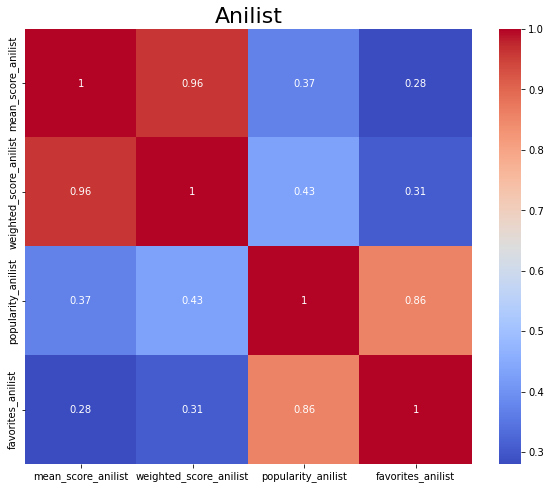

In [106]:
# Plot heatmap
plt.figure(figsize=(10, 8))
plt.title('Anilist', fontsize=22)
sns.heatmap(df_anilist.corr(), annot=True, cmap="coolwarm")

####**Pairplot**

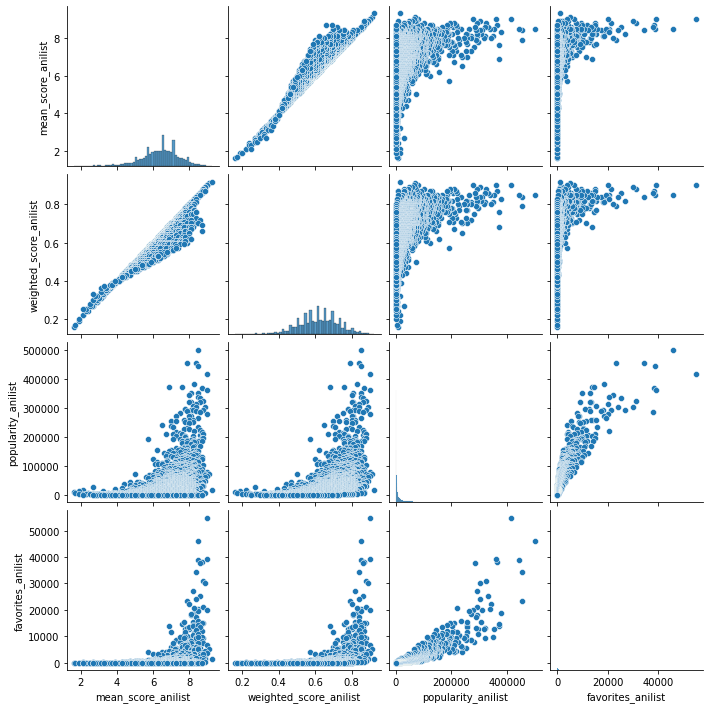

In [107]:
sns.pairplot(df_anilist, height=2.5)

### **Anisearch**

####**Heatmap**

In [108]:
df_anisearch = df_anisearch.dropna(subset=['mean_score_anisearch', 'popularity_anisearch',
                                 'favorites_anisearch', 'number_scorer_anisearch'])
df_anisearch = df_anisearch[['mean_score_anisearch', 'popularity_anisearch',
                                 'favorites_anisearch', 'number_scorer_anisearch']]
df_anisearch.head()

,mean_score_anisearch,popularity_anisearch,favorites_anisearch,number_scorer_anisearch
0,8.60,31.0,1018.0,6963.0
1,9.00,4.0,1182.0,11737.0
2,8.18,152.0,273.0,3185.0
3,8.68,20.0,237.0,2335.0
4,8.54,41.0,383.0,4311.0


In [109]:
# Check for corr
# Anisearch
corr_case(df_anisearch[['mean_score_anisearch', 'popularity_anisearch',
                        'favorites_anisearch', 'number_scorer_anisearch' ]])[2]

,mean_score_anisearch,popularity_anisearch,favorites_anisearch,number_scorer_anisearch
mean_score_anisearch,0.0000,0.0000,0.0000,0.0000
popularity_anisearch,0.0000,0.0000,0.0000,0.0000
favorites_anisearch,0.0000,0.0000,0.0000,0.0000
number_scorer_anisearch,0.0000,0.0000,0.0000,0.0000


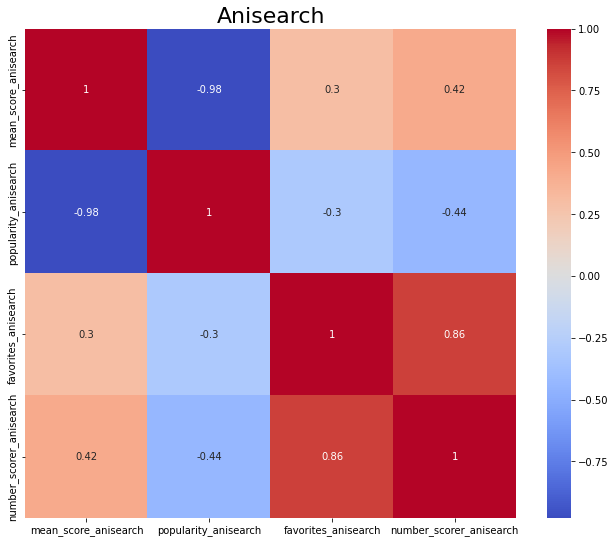

In [110]:
# Plot heatmap
plt.figure(figsize=(11, 9))
plt.title('Anisearch', fontsize=22)
# plt.tick_params(axis='x', labelrotation=15)
# plt.tick_params(axis='y', labelrotation=20)
sns.heatmap(df_anisearch.corr(), annot=True, cmap="coolwarm")

####**Pairplot**

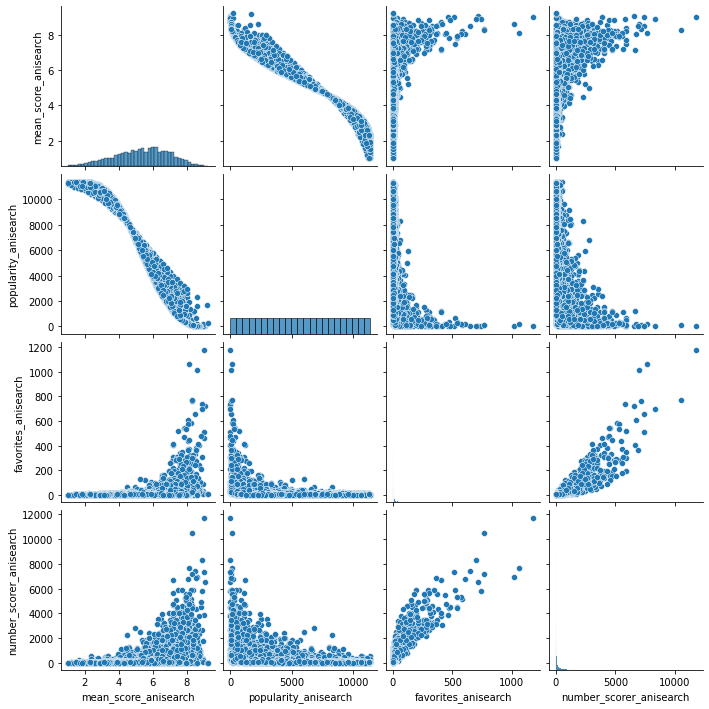

In [111]:
sns.pairplot(df_anisearch, height=2.5)

###**Kitsu**

####**Heatmap**

In [112]:
df_kitsu = df.dropna(subset=['mean_score_kitsu','favorite_count_kitsu', 'user_count_kitsu'])
df_kitsu = df_kitsu[['mean_score_kitsu','user_count_kitsu', 'favorite_count_kitsu']]
df_kitsu.head(5)

,mean_score_kitsu,user_count_kitsu,favorite_count_kitsu
0,8.49,350376.0,6835.0
1,8.36,303639.0,5750.0
2,8.45,325631.0,4349.0
4,8.43,243790.0,6271.0
5,8.35,341696.0,3384.0


In [113]:
# Check for corr
# Kitsu
corr_case(df_kitsu[['mean_score_kitsu',	'user_count_kitsu',	'favorite_count_kitsu']])[2]

,mean_score_kitsu,user_count_kitsu,favorite_count_kitsu
mean_score_kitsu,0.0000,0.0000,0.0000
user_count_kitsu,0.0000,0.0000,0.0000
favorite_count_kitsu,0.0000,0.0000,0.0000


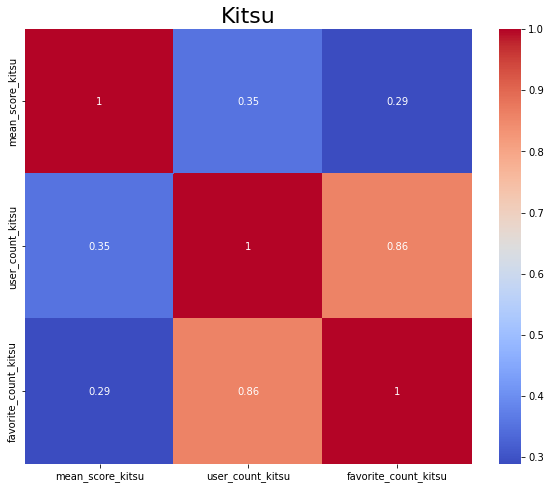

In [114]:
# Plot heatmap
plt.figure(figsize=(10, 8))
plt.title("Kitsu", fontsize=22)
sns.heatmap(df_kitsu.corr(), annot=True, cmap="coolwarm")

####**Pairplot**

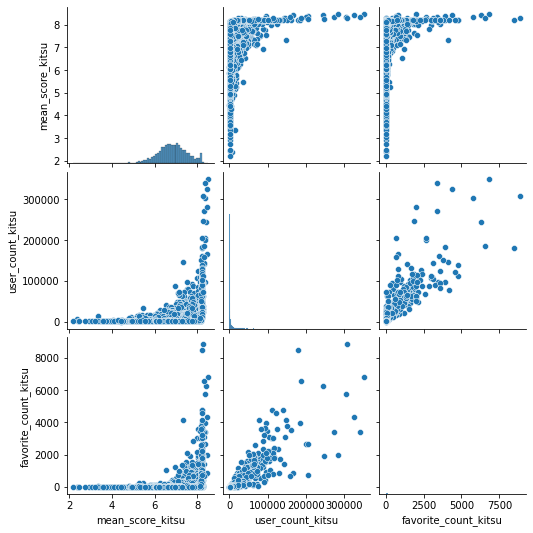

In [115]:
sns.pairplot(df_kitsu, height=2.5)

###**MAL**

####**Heatmap**

In [116]:
df_mal = df.dropna(subset=['mean_score_mal', 'popularity_mal', 'number_scorer_mal',
                                'favorites_mal'])
df_mal = df_mal[['mean_score_mal', 'popularity_mal', 'number_scorer_mal',
                  'favorites_mal']]
df_mal.head()

,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
0,8.51,3104669.0,2168959.0,137690.0
1,8.63,3130472.0,2159771.0,142925.0
2,7.99,2396529.0,1624157.0,50118.0
3,8.57,2069110.0,1380152.0,67452.0
4,9.06,2123271.0,1245840.0,164535.0


In [117]:
# Check for corr
# MAL
corr_case(df_mal[['mean_score_mal',	'popularity_mal',	'number_scorer_mal',	'favorites_mal']])[2]

,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
mean_score_mal,0.0000,0.0000,0.0000,0.0000
popularity_mal,0.0000,0.0000,0.0000,0.0000
number_scorer_mal,0.0000,0.0000,0.0000,0.0000
favorites_mal,0.0000,0.0000,0.0000,0.0000


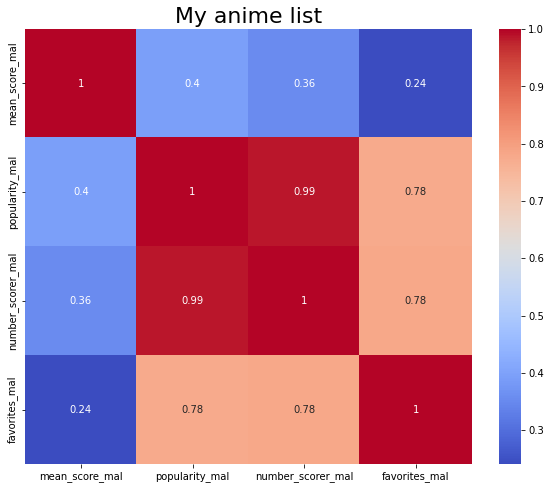

In [118]:
# Plot heatmap
plt.figure(figsize=(10, 8))
plt.title('My anime list', fontsize=22)
sns.heatmap(df_mal.corr(), annot=True, cmap="coolwarm")

####**Pairplot**

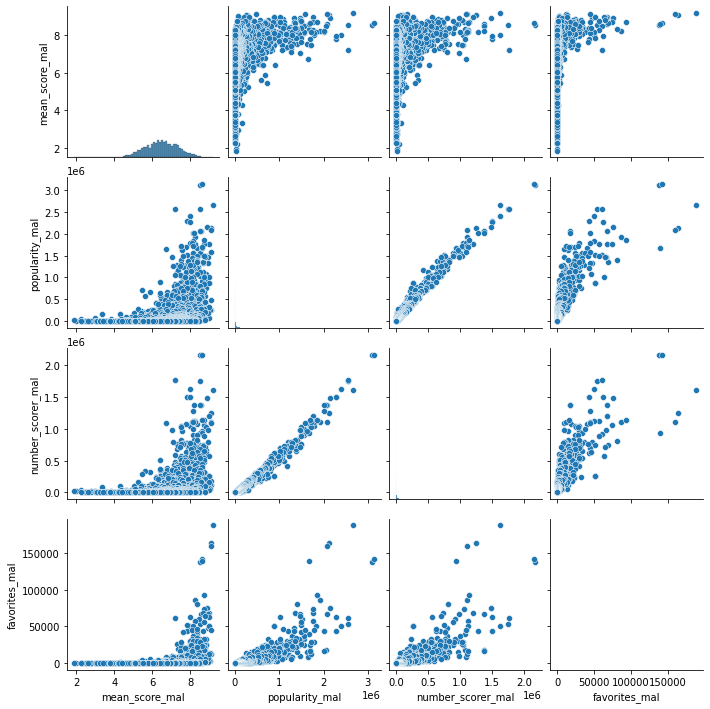

In [119]:
sns.pairplot(df_mal, height=2.5)

## **Correlation Test**


In [120]:
from researchpy.correlation import corr_case

In [121]:
# Anisearch
corr_case(df_anisearch[['mean_score_anisearch', 'popularity_anisearch',
                        'favorites_anisearch', 'number_scorer_anisearch' ]])[2]

,mean_score_anisearch,popularity_anisearch,favorites_anisearch,number_scorer_anisearch
mean_score_anisearch,0.0000,0.0000,0.0000,0.0000
popularity_anisearch,0.0000,0.0000,0.0000,0.0000
favorites_anisearch,0.0000,0.0000,0.0000,0.0000
number_scorer_anisearch,0.0000,0.0000,0.0000,0.0000


In [122]:
# Anilist
corr_case(df_anilist[['mean_score_anilist', 
                            'weighted_score_anilist',	
                            'popularity_anilist', 'favorites_anilist']])[2]

,mean_score_anilist,weighted_score_anilist,popularity_anilist,favorites_anilist
mean_score_anilist,0.0000,0.0000,0.0000,0.0000
weighted_score_anilist,0.0000,0.0000,0.0000,0.0000
popularity_anilist,0.0000,0.0000,0.0000,0.0000
favorites_anilist,0.0000,0.0000,0.0000,0.0000


In [123]:
# MAL
corr_case(df_mal[['mean_score_mal',	'popularity_mal',	'number_scorer_mal',	'favorites_mal']])[2]

,mean_score_mal,popularity_mal,number_scorer_mal,favorites_mal
mean_score_mal,0.0000,0.0000,0.0000,0.0000
popularity_mal,0.0000,0.0000,0.0000,0.0000
number_scorer_mal,0.0000,0.0000,0.0000,0.0000
favorites_mal,0.0000,0.0000,0.0000,0.0000


In [124]:
# Kitsu
corr_case(df_kitsu[['mean_score_kitsu',	'user_count_kitsu',	'favorite_count_kitsu']])[2]

,mean_score_kitsu,user_count_kitsu,favorite_count_kitsu
mean_score_kitsu,0.0000,0.0000,0.0000
user_count_kitsu,0.0000,0.0000,0.0000
favorite_count_kitsu,0.0000,0.0000,0.0000
